Each task that is proposed to be completed as part of the homework has a declared "price" in points. The maximum possible amount is 10 points, and together with bonus assignments - 12 points. It is not necessary to complete all the tasks, only a part can be done. Most of the points expect you to write working Python code; sometimes you will need to write comments - for example, to compare several approaches to solve the same problem. Also you can add more cells for your convenience if you need.

This homework focuses on clustering. We will work with images of handwritten digits, learn how to cluster them using two different methods (hierarchical clustering and the 𝐾-means algorithm), evaluate the quality of the partition and choose the optimal number of clusters, as well as visualize intermediate results.

## 1. Loading data
The data we will be working with is available in the scikit-learn library (`sklearn` module) in the `datasets` submodule via the `load_digits` function. The data contains 1,797 observations, each of which is 8×8 pixel image of a handwritten digit from 0 to 9. This is about the same amount of each digit (about 180).

For convenience, every image expands to a 64 (8×8) row, so entire numpy array is 1797×64. The color intensity in each pixel is encoded with an integer from 0 to 16.

In addition to images, their labels are also known. In this task, we will assume that the labels (as well as their amount) are unknown and try to group the data in such a way that the resulting clusters 'better match' the original ones. Possible options for determining the 'better match' are presented later.

**(0.25 points)** Load the images into `X` variable, and their labels into `y` variable.

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
X = load_digits(return_X_y=True)[0]
y = load_digits(return_X_y=True)[1]

In [5]:
X.shape

(1797, 64)

In [6]:
y.shape

(1797,)

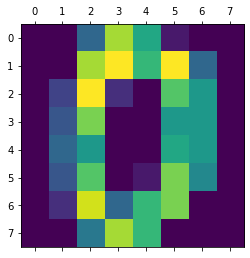

In [7]:
plt.matshow(digits.images[0])

In [8]:
assert X.shape == (1797, 64)
assert y.shape == (1797,)

**(0.5 points)** Visualize the first 10 images.

- Arrange images on a grid rather than in a row. You may need the `subplot` and `imshow` functions from the `pyplot` module in the `matplotlib` library.
- You will also need to reshape the images to 8×8.
- Remove ticks and labels from both axes. The `xticks` and `yticks` functions or the `tick_params` function from `pyplot` can help you with this.
- Make the output good sized with the `figure` function from `pyplot`.

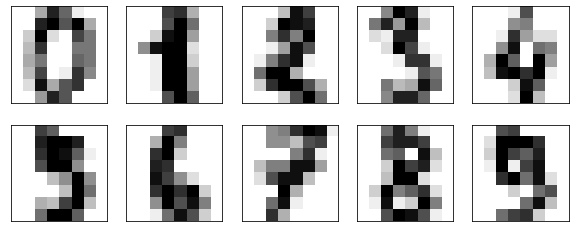

In [9]:
fig = plt.figure(figsize=(10,4))

for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[], yticks=[])
    ax.imshow(digits.images[i].reshape([8,8]),cmap=plt.cm.binary)

## 2. Clustering and quality evaluation

**(2 points)** Implement the the KMeans algorithm. Use objective function $L = \sum_{i=1}^{n}|x_{i}-Z_{A(x_{i})}|^{2}$, where $Z_{A(x_{i})}$ is the center of the cluster corresponding to $x_{i}$ object.

In [10]:
from sklearn.exceptions import NotFittedError
from numpy.random import RandomState
from sklearn.metrics import pairwise_distances

# Не реализовал, смотрите задания ниже

In [2]:
class CustomKMeans:
    def __init__(self, n_clusters=2, max_iter=30, n_init=10, random_state=42):
        '''K-Means clustering.
        
        Args:
            n_clusters: int, default=2
                The number of clusters to be formed is also 
                the number of centroids to generate. 
            max_iter: int, default=300
                Maximum number of iterations of the k-means algorithm for a
                single run.
            n_init: int, default=10
                Number of time the k-means algorithm will be run with different
                centroid seeds. The final results will be the best output of
                n_init consecutive runs in terms of objective function.
            random_state: int, default=42
                Random state.
        '''
        self.n_clusters = n_clusters
        self.n_init = 10
        self.max_iter = 300
        self.random_state = RandomState(seed=random_state)
        
    def calculate_distances_to_centroids(self, X, cluster_centers):
        """
        Returns (n, c) matrix where the element at position (i, j) 
        is the distance from i-th object to j-th centroid."""
        #matrix = np.empty(X.shape[0] * cluster_centers.shape[0]).reshape(X.shape[0],cluster_centers.shape[0])
        #for i in range(X.shape[0]):
        #    for j in range(cluster_centers.shape[0]):
        #        matrix[i][j] = np.sqrt(np.sum(X[i] * cluster_centers[j])**2)
        
        return pairwise_distances(X, cluster_centres)
    
    def update_centroids(self, X, nearest_clusters):
        """
        Returns numpy array of shape (n_clusters, n_features) - 
        new clusters that are found by averaging objects belonging 
        to the corresponding cluster."""
        # <your code>
        matrix = np.empty(self.n_clusters * X.shape[1]).reshape(self.n_clusters * X.shape[1])
        for i in range(nearest_clusters):
            matrix[i][j] = np.mean(X[i,:])
        return matrix
        
    def fit(self, X):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        """
        assert X.shape[0] >= self.n_clusters
        # <your code>
        #initialize centroids
        centroid_min = X.min()
        centroid_max = X.max()
        centroids = []
        
        for centroid in self.n_clusters:
            centroid = np.random.iniform(centroid_min, centroid_max, X.shape[1])
            centroids.append(centroid)
            
        
        for i in range(self.max_iter):
            self.classifications = {}
        
            for i in range(self.n_clusters):
                self.classifications[i] = []
                

                distances = self.calculate_distances_to_centroids(X, centroids)
                classification = distances.index(min(distances))
                centroids = self.update_centroids(X, classifications) 
                prev_centroids = dict(centroids)
                
                optimized = True
                
                for c in self.centroids:
                    original_c = prev_centroids[c]
                    current_c = self.centroids[c]
                    if np.sum((current_c - original_c) / original_c*100) > self.tol:
                        optimized = False
                if optimized:
                    break
        L= np.sum()
        ∑ni=1|xi−ZA(xi)|2
        
        con1 = {'type': 'eq', 'fun': norm_constraint}

        clusters = np.zeros(13) # your code: initial vector to start optimization

        sol = minimize(calculate_distances_to_centroids, 
               x0, 
               constraints = [con1]
              )
        x0 = sol.x

        self.calculate_distances_to_centroids(X, )
        self.update_centroids(X, )
        
        return self
            
    
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted cluster labels.
        """
        if hasattr(self, 'cluster_centers_'):
            # <your code>
            pass
        else: 
            raise NotFittedError("CustomKMeans instance is not fitted yet")

**(1 points)** Get the `X` array partition into 10 clusters. Visualize the centers of clusters.
- We will assume that the center of the cluster is average value of all observations belonging to the cluster.
- The cluster centers should have the same shape as our observations (64). So you have to average the points across the rows.

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters = 10,n_init=10,max_iter=30, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [13]:
len(y_kmeans)

1797

In [14]:
digits.images[1].reshape([8,8])

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [15]:


X[1].reshape([8,8])

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

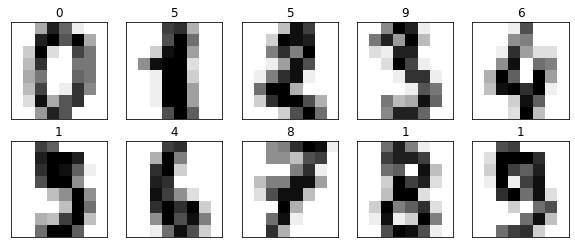

In [16]:
fig = plt.figure(figsize=(10,4))

for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[], yticks=[])
    ax.set_title(y_kmeans[i])
    ax.imshow(digits.images[i].reshape([8,8]),cmap=plt.cm.binary)

In [ ]:
custom_kmeans_labels = ...
assert custor_kmeans_labels.shape == (1797,)

**(0.5 points)** Experiment with `max_iter` and `n_init` parameters. Look at the range of values of the objective function, it's best values, at what parameters and how often they are achieved.

Now we will use two popular algorithms: hierarchical clustering and $K$-means clustering. These and other algorithms are available in the `scikit-learn` module in the `cluster` submodule. Hierarchical clustering is called `AgglomerativeClustering`, and the $K$-means method is called `KMeans`.

**(0.5 points)** Use each of the two methods: hierarchical clustering and KMeans. Get the `X` array partition into 10 clusters.

- Note that `AgglomerativeClustering` does not have a `predict` method, so you can either use the `fit_predict` method or use the `fit` method and then look at the `labels_` attribute of the class instance.
- Kmeans performs multiple runs (default 10) with random centers and then returns the best partition in terms of average distance within the clusters. You can increase the number of runs to improve the quality of predictions in the `i_init` parameter.

In [18]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [19]:
model = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
model.fit(X)
hierarchical_labels = model.labels_

In [20]:
kmeans = KMeans(n_clusters = 10,n_init=10,max_iter=30, random_state=42)
kmeans.fit(X)
kmeans.predict(X)
#kmeans_labels = kmeans.predict(X)
kmeans_labels = kmeans.labels_

In [21]:
assert hierarchical_labels.shape == (1797,)
assert kmeans_labels.shape == (1797,)

**(0.5 points)** Visualize the centers of clusters obtained by both methods.

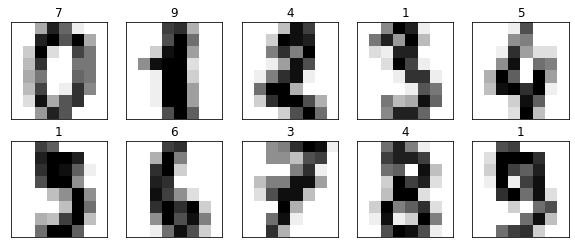

In [22]:
fig = plt.figure(figsize=(10,4))

for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[], yticks=[])
    ax.set_title(hierarchical_labels[i])
    ax.imshow(digits.images[i].reshape([8,8]),cmap=plt.cm.binary)

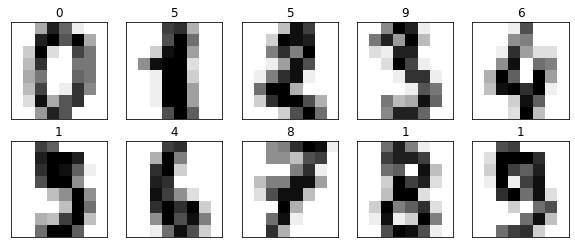

In [23]:
fig = plt.figure(figsize=(10,4))

for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[], yticks=[])
    ax.set_title(kmeans_labels[i])
    ax.imshow(digits.images[i].reshape([8,8]),cmap=plt.cm.binary)

In a situation where the true number of classes is unknown, we can select it by maximazing some metric.

When we can set some distance function between our observations, we can consider the `silhouette` distance as a function of measuring the quality of the clustering. Let's show how it is calculated:

Let $X$ – set of observations, $M \subset X$ – one of the clusters obtained as a result of clustering process, $\rho$ – some metric on $X$. Let's choose one observation $x \in M$. Denote $a(x)$ as the average distance from $x$ to  $x'$ points from the same cluster:
$$
a(x) = \frac{1}{|M| - 1} \sum_{x' \in M,\, x' \ne x} \rho(x,\, x')
$$

Denote $b(x)$ as minimun of average distances from $x$ to $x''$ from some other cluster $N$:
$$
b(x) = \min_{N \ne M} \frac{1}{|N|} \sum_{x'' \in N} \rho(x,\, x'')
$$

The silhouette is difference between a(x) and b(x), normalized to $[-1, \, 1]$ and averaged over all observations:
$$
\frac{1}{|X|} \sum_{x \in X} \frac{b(x) - a(x)}{\max(a(x),\, b(x))}
$$

The implementation of this metric in the `scikit-learn` is the `silhouette_score` function from the `metrics` submidule.

**(1 point)** For each $K$ between 2 and 20 inclusive, partition of the array $X$ into $K$ clusters using both methods. Calculate the silhouette score and visualize it for both methods on the same plot ($K$ on the $x$ axis and silhouette score on the $y$ axis). Sign the axes and make a legend.

In [24]:
from sklearn.metrics import silhouette_score,v_measure_score

In [25]:
K = list(range(2,21,1))
knn_sil = []
hie_sil = []
for k in K:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(X)
    kmeans.predict(X)
    kmeans_labels = kmeans.labels_
    knn_sil.append(silhouette_score(X, kmeans_labels))
    
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X)
    hierarchical_labels = model.labels_
    hie_sil.append(silhouette_score(X, hierarchical_labels))

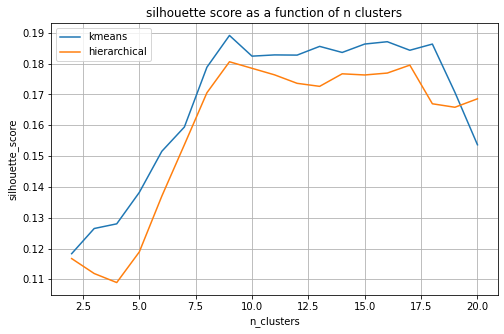

In [26]:
plt.figure(figsize=(8,5))
plt.plot(K, knn_sil, label='kmeans')
plt.plot(K, hie_sil, label='hierarchical')
plt.legend()
plt.title('silhouette score as a function of n clusters')
plt.ylabel('silhouette_score')
plt.xlabel('n_clusters')
plt.grid(True)

When we know the true clustering labels, the clustering result can be compared to them using measures such as `homogeneity`, `completeness` and their harmonic mean - $V$-score. The definitions of these quantities are rather bulky and are based on the [entropy of the probability distribution](https://ru.wikipedia.org/wiki/Информационная_энтропия). Details are given in [this article](http://aclweb.org/anthology/D/D07/D07-1043.pdf). In practice, it's enough to know that `homogeneity`, `completeness` and $V$-score are in the range from 0 and 1, and the more, the better.

Since we know what digit each image is (`y` array), we can compare the clustering results to it using the measures listed above.

**(0.5 points)** Repeat the previous task using $V$-measure instead of silhouette.

In [27]:
K = list(range(2,21,1))
knn_v = []
hie_v = []
for k in K:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(X)
    kmeans.predict(X)
    kmeans_labels = kmeans.labels_
    knn_v.append(v_measure_score(y, kmeans_labels))
    
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X)
    hierarchical_labels = model.labels_
    hie_v.append(v_measure_score(y, hierarchical_labels))

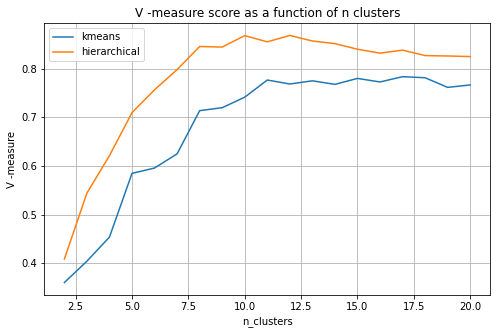

In [28]:
plt.figure(figsize=(8,5))
plt.plot(K, knn_v, label='kmeans')
plt.plot(K, hie_v, label='hierarchical')
plt.legend()
plt.title('V -measure score as a function of n clusters')
plt.ylabel('V -measure')
plt.xlabel('n_clusters')
plt.grid(True)


## 3. Feature space dimensionality reduction

In some cases, especially when there are a large number of features, when not all of them are informative, and some of them are correlated, it can be useful to reduce the dimension of the feature space. This mean that instead of $d$ original features, we will go to $d'\ll d$ new ones. And if earlier our data were presented in the form of an $n×d$ matrix, then it will presented as a $n×d'$.

There are two popular dimensionality reduction approaches:
- select new features from existing features;
- extract the new features by transforming old ones, for example, by making $d'$ different linear combinations of columns of an $n×d$ matrix.

One widely used dimensionality reduction technique is the Singular Value Decomposition (SVD). This method allows you to construct any number $d'\leq d$ of new features in such a way that they are the most informative (in some sense).

The `scikit-learn` module has several implementations of singular value decomposition. We will use the `TruncatedSVD` class from the `decomposition` submodule.

**Note:** The singular value decomposition of the matrix $M$ is usually written as $M=U \Sigma V^{*}$. `TruncatedSVD`, in turn, returns only the $d'$ first columns of the matrix $U$.

**(1 point)** Perform a singular value decomposition of the $X$ matrix, leaving 2, 5, 10, 20 features. In each case, perform hierarchical clustering and $K$-Means clustering (take the number of clusters equal to 10). Calculate the silhouette and $V$-score and compare them to corresponding values obtained from the original data.

**Note**: It is not valid to compare the silhouette calculated with different metrics. Even if we use the same metric function when calculating the distance between points in the data, after applying dimensionality reduction or other data transformations, we will (not always) get different silhouette scores. Therefore, after training the clustering algorithm, to compare the result of clustering, you need to calculate the silhouette on the original data.

In [29]:
from sklearn.decomposition import TruncatedSVD

In [30]:
K_svd = [2,5,10,20]
knn_v_svd, knn_sil_svd = [], []
hie_v_svd, hie_sil_svd = [], []
for k in K_svd:
    svd = TruncatedSVD(n_components=k, n_iter=7, random_state=42)
    x_k = svd.fit_transform(X)
    
    kmeans = KMeans(n_clusters = 10, random_state=42)
    kmeans.fit(x_k)
    kmeans.predict(x_k)
    kmeans_labels = kmeans.labels_
    knn_v_svd.append(v_measure_score(y, kmeans_labels))
    knn_sil_svd.append(silhouette_score(X, kmeans_labels))
    
    model = AgglomerativeClustering(n_clusters=10)
    model.fit(x_k)
    hierarchical_labels = model.labels_
    hie_v_svd.append(v_measure_score(y, hierarchical_labels))
    hie_sil_svd.append(silhouette_score(X, hierarchical_labels))

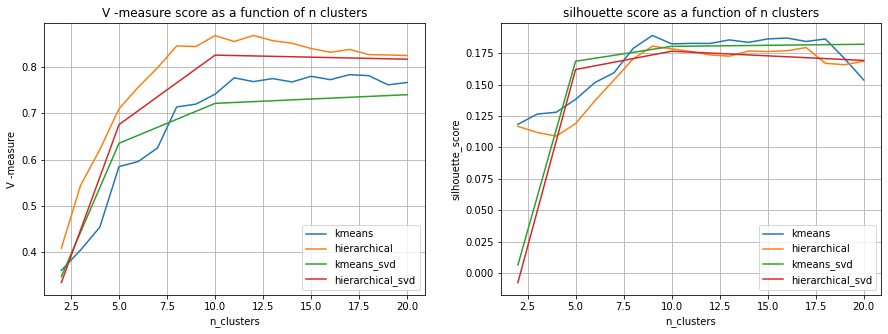

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

#ax1.figure(figsize=(8,5))
ax1.plot(K, knn_v, label='kmeans')
ax1.plot(K, hie_v, label='hierarchical')
ax1.plot(K_svd, knn_v_svd, label='kmeans_svd')
ax1.plot(K_svd, hie_v_svd, label='hierarchical_svd')
ax1.legend()
ax1.set_title('V -measure score as a function of n clusters')
ax1.set_ylabel('V -measure')
ax1.set_xlabel('n_clusters')
ax1.grid(True)

ax2.plot(K, knn_sil, label='kmeans')
ax2.plot(K, hie_sil, label='hierarchical')
ax2.plot(K_svd, knn_sil_svd, label='kmeans_svd')
ax2.plot(K_svd, hie_sil_svd, label='hierarchical_svd')
ax2.legend()
ax2.set_title('silhouette score as a function of n clusters')
ax2.set_ylabel('silhouette_score')
ax2.set_xlabel('n_clusters')
ax2.grid(True)

Another popular dimensionality reduction approach that is useful for working with images is t-distributed stochastic neighbor embeddings, abbreviated `tSNE`. Unlike singular value decomposition, this it is non-linear transformation. It's main idea is to map points from a space of dimension `d` to another space of dimension 2 or 3 in such a way that the distances between points are mostly preserved. Mathematical details can be found, for example, [here](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).

The implementation of `tSNE` in the `scikit-learn` library is the `TSNE` class in the `manifold` submodule.

**Note:** In recent years [UMAP](https://github.com/lmcinnes/umap) is often used istead of `tSNE`. It is a faster algorithm with similar properties. We don't ask you to use `UMAP` because it requires you to install another dependency, the `umap-learn` library. Those who wish can perform the following task using `UMAP`.

**(0.5 points)** Perform a tSNE-transform of the `X` matrix, leaving 2 features. Visualize the obtained data in the form of a scatter plot form: the first feature on the horizontal axis, and the second one the vertical axis. Color the points according to the digits they belong to.

- The `c` parameter in the plt.scatter function is responsible for the color of the points. Pass the true labels to it.

In [32]:
from sklearn.manifold import TSNE

tSNE = TSNE(n_components=2)
tSNE_result = tSNE.fit_transform(X)
tSNE_result.shape


(1797, 2)

In [33]:
tSNE_result.shape

(1797, 2)

In [34]:
tSNE_result[:,0].shape

(1797,)

Text(0, 0.5, 't-SNE-2')

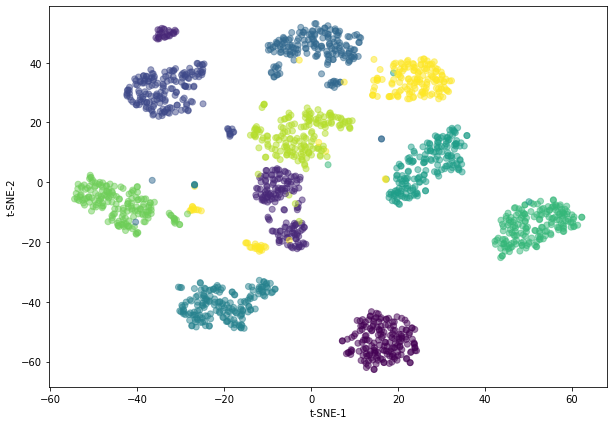

In [35]:
plt.figure(figsize=(10,7))
plt.scatter(tSNE_result[:,0], tSNE_result[:,1], c=y, alpha=0.5)
plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')

**(0.5 points)** From the data transformed using the tSNE, perform hierarchical clustering and $K$-means clustering (take the number of clusters equal to 10). Calculate the silhouette and the $V$-score and compare them to corresponding values obtained from the original data.

In [36]:
K_svd = [2,5,10,20]
knn_v_svd, knn_sil_svd = [], []
hie_v_svd, hie_sil_svd = [], []
for k in K_svd:
    svd = TruncatedSVD(n_components=k, n_iter=7, random_state=42)
    x_k = svd.fit_transform(X)
    
    kmeans = KMeans(n_clusters = 10, random_state=42)
    kmeans.fit(x_k)
    kmeans.predict(x_k)
    kmeans_labels = kmeans.labels_
    knn_v_svd.append(v_measure_score(y, kmeans_labels))
    knn_sil_svd.append(silhouette_score(X, kmeans_labels))
    
    model = AgglomerativeClustering(n_clusters=10)
    model.fit(x_k)
    hierarchical_labels = model.labels_
    hie_v_svd.append(v_measure_score(y, hierarchical_labels))
    hie_sil_svd.append(silhouette_score(X, hierarchical_labels))

In [37]:
tSNE = TSNE(n_components=2)
tSNE_result = tSNE.fit_transform(X)
kmeans = KMeans(n_clusters = 10, random_state=42)
kmeans.fit(tSNE_result)
kmeans.predict(tSNE_result)
kmeans_labels = kmeans.labels_
centres = kmeans.cluster_centers_
knn_v_tsne= v_measure_score(y, kmeans_labels)
knn_sil_tsne = silhouette_score(X, kmeans_labels)


In [38]:
kmeans = KMeans(n_clusters = 10, random_state=42)
kmeans.fit(X)
kmeans.predict(X)
kmeans_labels = kmeans.labels_
centres = kmeans.cluster_centers_
knn_v_orig = v_measure_score(y, kmeans_labels)
knn_sil_orig = silhouette_score(X, kmeans_labels)

In [40]:
tSNE = TSNE(n_components=2)
tSNE_result = tSNE.fit_transform(X)
model = AgglomerativeClustering(n_clusters=10)
model.fit(tSNE_result)
hierarchical_labels = model.labels_
hie_v_tsne = v_measure_score(y, hierarchical_labels)
hie_sil_tsne = silhouette_score(X, hierarchical_labels)

In [41]:
model = AgglomerativeClustering(n_clusters=10)
model.fit(X)
hierarchical_labels = model.labels_
hie_v_orig = v_measure_score(y, hierarchical_labels)
hie_sil_orig = silhouette_score(X, hierarchical_labels)

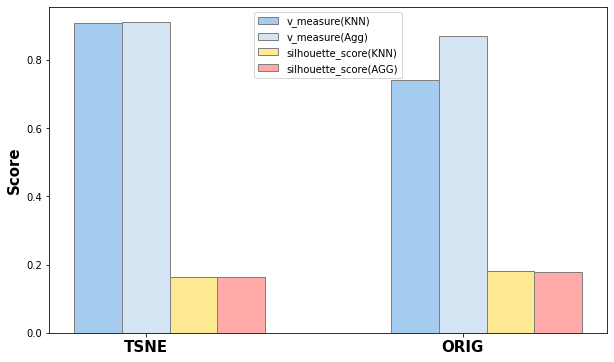

In [43]:
# set height of bar
import numpy as np
plt.figure(figsize=(10,6))
barWidth = 0.15
v_tsne = [knn_v_tsne,knn_v_orig]
v_orig = [hie_v_tsne,hie_v_orig]
sil_tsne = [knn_sil_tsne, knn_sil_orig]
sil_orig = [hie_sil_tsne, hie_sil_orig]
 
colors= ['#a5cbef', '#d4e4f3', '#ffea94','#ffa9a8']

#TSNE = [knn_v_tsne, knn_sil_tsne, hie_v_tsne, hie_sil_tsne]
#ORIG = [knn_v_orig, knn_sil_orig, hie_v_orig, hie_sil_orig]
 
# Set position of bar on X axis
br1 = np.arange(len(v_tsne))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, v_tsne, color =colors[0], width = barWidth,
        edgecolor ='grey', label ='v_measure(KNN)')
plt.bar(br2, v_orig, color =colors[1], width = barWidth,
        edgecolor ='grey', label ='v_measure(Agg)')
plt.bar(br3, sil_tsne, color =colors[2], width = barWidth,
        edgecolor ='grey', label ='silhouette_score(KNN)')
plt.bar(br4, sil_orig, color =colors[3], width = barWidth,
        edgecolor ='grey', label ='silhouette_score(AGG)')
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.xticks(br2, ('TSNE', 'ORIG'),fontweight ='bold', fontsize = 15)
 
plt.legend()
plt.show()

X[kmeans_labels]**(0.25 points)** Choose the best partition (in terms of silhouette or $V$-score) and visualize the centers of clusters with images. Did you managed to make each digit correspond to one center of the cluster?

In [44]:
X[kmeans_labels][0].shape

(64,)

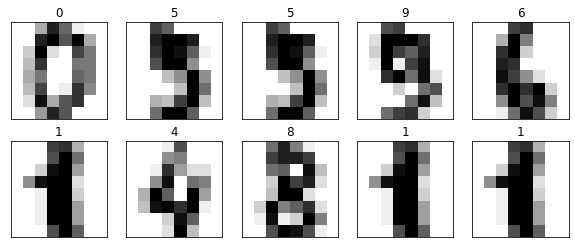

In [45]:
fig = plt.figure(figsize=(10,4))

for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[], yticks=[])
    ax.set_title(kmeans_labels[i])
    ax.imshow(X[kmeans_labels][i].reshape([8,8]),cmap=plt.cm.binary)

## 4. Results and bonus part

Write in free form what conclusions you made after completing this assignment. Answer the following questions:

**(0.5 points)** Which algorithm gives more meaningful results - hierarchical clustering or $K$- means clustering. Does it depend on the algorithm settings or on the quality evaluation method?

В методе KMeans мы изначально должны знать количетсво кластеров, на которые будем разбивать данные. В hierarchical clustering  можно остановиться на любом количестве кластеров, которые можно найти интерпретируя дендрограмму.
Метод KMeans быстрее работает на больших объёмах данных. Результаты работа hierarchical clustering более информативны,  всегда можно посмотреть на дендограмму.
конечно зависит от параметров, которые мы передаем в наш метод кластеризации. Даже начинаю с самого банального - количество кластеров. 

**(0.5 points)** Imagine the situation where after hierarchical clustering, you need to cluster new data in the same way without retraining the model. Suggest a method how you will do it and how you will measure the quality of clustering of new data.

Немного непонятен вопрос. В кластеризации у нас нет лейблов, поэтому мы не обучаем модель. В Обучении данные разбиваютсяна трейн и тест, обучние используется для того чтобы предотвратить переобучение
Нужно записать местоположения центроида, а затем добавить новую точку данных в кластер с ближайшим центроидом. Нужно следить, чтобы ваши центроиды не отошли слишком далеко от своих местоположений в исходной кластеризации. 

**(0.5 points)** Does dimensionality reduction improve clustering results?

В нашем случае видно, что после применения tsne v_measure для kmeans выросло. Остальные метрики скора изменились не сильне(Значения силуета почти не изменилось). 
Но в других задачх уменьшение размерности важно, потому что делает
данные с высокой размерностью более понятными, но и снижает вычислительные затраты. Также может предоставить пользователям более четкую
картину и визуальный анализ  интересующих данных.

**(0.5)** How to evaluate the quality of dimensional reducrion? Suggest at least 2 options.

Нашел только измерения качества основанное на ранговых ошибках

**(Bonus 2 points)** Load the [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist) dataset. You can also do it with `scikit-learn` as explained [here](https://stackoverflow.com/a/60450028). Explore the data and try to cluster it using different approaches. Compare results of these approaches using the silhouette and the $V$-score.

In [46]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

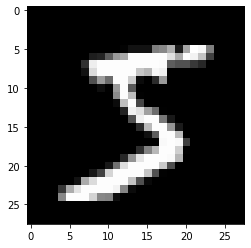

In [47]:
img = X.to_numpy()[0].reshape([28,28])
plt.imshow(img, cmap="gray")

In [65]:
X = X[:2000]
y = y[:2000]
y = np.array([int(i) for i in y])

In [67]:
mnist_knn = KMeans(n_clusters=10, n_init=10, max_iter=20, random_state=42)
mnist_knn.fit(X)
mnist_knn_labels = mnist_knn.labels_
mnist_knn_centres = mnist_knn.cluster_centers_
v_mnist = v_measure_score(y, mnist_knn_labels)
sil_mnist = silhouette_score(X, mnist_knn_labels)

In [68]:
print('KMeans results', v_mnist, sil_mnist)

KMeans results 0.4918675945137449 0.066222787019071


In [69]:
model = AgglomerativeClustering(n_clusters=10)
model.fit(X)
hierarchical_labels = model.labels_
hie_v_mnist = v_measure_score(y, hierarchical_labels)
hie_sil_mnist = silhouette_score(X, mnist_knn_labels)

In [70]:
print('Agg results', hie_v_mnist, hie_sil_mnist)

Agg results 0.5948601669056044 0.066222787019071


In [71]:

svd = TruncatedSVD(n_components=10, n_iter=7, random_state=42)
x_k = svd.fit_transform(X)
    
kmeans = KMeans(n_clusters = 10, random_state=42)
kmeans.fit(x_k)
kmeans.predict(x_k)
kmeans_labels = kmeans.labels_
knn_v_svd = (v_measure_score(y, kmeans_labels))
knn_sil_svd = (silhouette_score(X, kmeans_labels))
    
model = AgglomerativeClustering(n_clusters=10)
model.fit(x_k)
hierarchical_labels = model.labels_
hie_v_svd = (v_measure_score(y, hierarchical_labels))
hie_sil_svd = (silhouette_score(X, hierarchical_labels))

In [72]:
print('KMeans results after svd',knn_v_svd, knn_sil_svd)
print('Agg results after svd',hie_v_svd, hie_sil_svd)

KMeans results after svd 0.4732490857570146 0.06927518541644086
Agg results after svd 0.465577324755889 0.051598848477393655


Text(0, 0.5, 't-SNE-2')

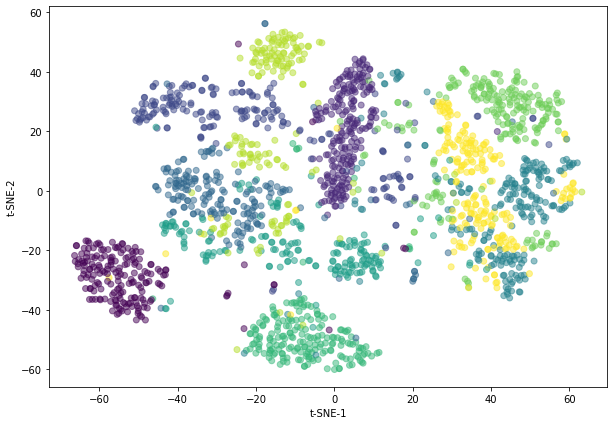

In [73]:
from sklearn.manifold import TSNE

tSNE = TSNE(n_components=2)
tSNE_result = tSNE.fit_transform(X)
tSNE_result.shape

plt.figure(figsize=(10,7))
plt.scatter(tSNE_result[:,0], tSNE_result[:,1], c=np.array(y), alpha=0.5)
plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')

In [74]:
kmeans = KMeans(n_clusters = 10, random_state=42)
kmeans.fit(tSNE_result)
kmeans.predict(tSNE_result)
kmeans_labels = kmeans.labels_
centres = kmeans.cluster_centers_
knn_v_tsne= v_measure_score(y, kmeans_labels)
knn_sil_tsne = silhouette_score(X, kmeans_labels)

In [75]:
print('KMeans results after tsne', knn_v_tsne, knn_sil_tsne)

KMeans results after tsne 0.6094818893257427 0.053018808006680275


In [76]:
model = AgglomerativeClustering(n_clusters=10)
model.fit(tSNE_result)
hierarchical_labels = model.labels_
hie_v_tsne = v_measure_score(y, hierarchical_labels)
hie_sil_tsne = silhouette_score(X, hierarchical_labels)

In [77]:
print('Agg results after tsne', hie_v_tsne, hie_sil_tsne)

Agg results after tsne 0.62550882490472 0.055156087341957004


/var/folders/ky/0pprcqtj4n74fc7bjg8w_ct00000gn/T/ipykernel_31008/1333089166.py:37: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_xticks(br2, ('TSNE', 'ORIG'))


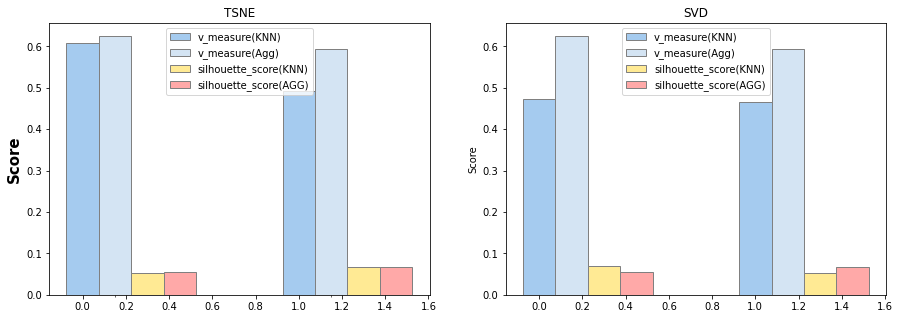

In [105]:

import numpy as np

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

barWidth = 0.15
v_tsne = [knn_v_tsne,v_mnist]
v_orig = [hie_v_tsne,hie_v_mnist]
v_svd = [knn_v_svd, hie_v_svd]

sil_tsne = [knn_sil_tsne, sil_mnist]
sil_orig = [hie_sil_tsne, hie_sil_mnist]
sil_svd = [knn_sil_svd, hie_sil_svd]     
      
colors= ['#a5cbef', '#d4e4f3', '#ffea94','#ffa9a8']

#TSNE = [knn_v_tsne, knn_sil_tsne, hie_v_tsne, hie_sil_tsne]
#ORIG = [knn_v_orig, knn_sil_orig, hie_v_orig, hie_sil_orig]
 
# Set position of bar on X axis
br1 = np.arange(2)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth*10 for x in br4]
br6 = [x + barWidth for x in br5] 
# Make the plot
ax1.bar(br1, v_tsne, color =colors[0], width = barWidth,
        edgecolor ='grey', label ='v_measure(KNN)')
ax1.bar(br2, v_orig, color =colors[1], width = barWidth,
        edgecolor ='grey', label ='v_measure(Agg)')
ax1.bar(br3, sil_tsne, color =colors[2], width = barWidth,
        edgecolor ='grey', label ='silhouette_score(KNN)')
ax1.bar(br4, sil_orig, color =colors[3], width = barWidth,
        edgecolor ='grey', label ='silhouette_score(AGG)')

ax1.set_ylabel('Score', fontweight ='bold', fontsize = 15)
ax1.set_xticks(br2, ('TSNE', 'ORIG'))
ax1.set_title('TSNE')
 
ax2.bar(br1, v_svd, color =colors[0], width = barWidth,
        edgecolor ='grey', label ='v_measure(KNN)')
ax2.bar(br2, v_orig, color =colors[1], width = barWidth,
        edgecolor ='grey', label ='v_measure(Agg)')
ax2.bar(br3, sil_svd, color =colors[2], width = barWidth,
        edgecolor ='grey', label ='silhouette_score(KNN)')
ax2.bar(br4, sil_orig, color =colors[3], width = barWidth,
        edgecolor ='grey', label ='silhouette_score(AGG)')

ax2.set_ylabel('Score')
ax2.set_title('SVD')
    
ax1.legend()
ax2.legend()
plt.show()

# Test

In [254]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [244]:
a = [-1, -2, -1, 0, 2, 2]
b = [-1, -1, -2, 0, 1, 3]
#[-1, -1], x₂ = [-2, -1], x₃ = [-1, -2], x₄ = [0, 0], x₅ = [2, 1], x₆ = [2, 3].
point = ['P1','P2','P3','P4','P5', 'P6']
data = pd.DataFrame({'Point':point, 'a':np.round(a,2), 'b':np.round(b,2)})
data = data.set_index('Point')
data

,a,b
Point,,
P1,-1,-1
P2,-2,-1
P3,-1,-2
P4,0,0
P5,2,1
P6,2,3


Text(0, 0.5, 'column b')

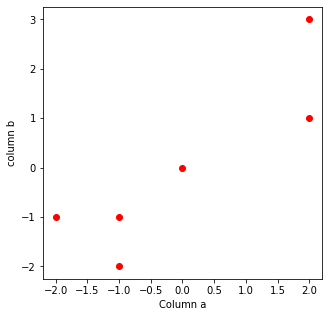

In [249]:
plt.figure(figsize=(5,5))
plt.scatter(data['a'], data['b'], c='r')
plt.xlabel('Column a')
plt.ylabel('column b')

In [256]:
dist = pd.DataFrame(squareform(pdist(data[['a', 'b']]), 'euclidean'), columns=data.index.values, index=data.index.values)
dist

,P1,P2,P3,P4,P5,P6
P1,0.000000,1.000000,1.000000,1.414214,3.605551,5.000000
P2,1.000000,0.000000,1.414214,2.236068,4.472136,5.656854
P3,1.000000,1.414214,0.000000,2.236068,4.242641,5.830952
P4,1.414214,2.236068,2.236068,0.000000,2.236068,3.605551
P5,3.605551,4.472136,4.242641,2.236068,0.000000,2.000000
P6,5.000000,5.656854,5.830952,3.605551,2.000000,0.000000


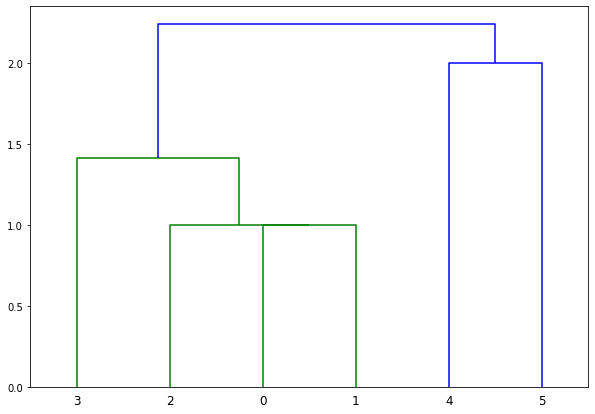

In [264]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(data, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [270]:
init=np.array([[-1, 1],[0, 0]])
init.shape[1] == X.shape[1]

True

In [271]:
init.shape[0] == 2

True

In [298]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[-1, -1], [-2, -1], [-1, -2],
               [0, 0], [2, 1], [2, 3]])
kmeans = KMeans(n_clusters=2, init=np.array([[-1, 1],[0, 0]]),n_init=1).fit(X)
kmeans.labels_

array([1, 1, 1, 1, 0, 0], dtype=int32)

Text(0, 0.5, 'column b')

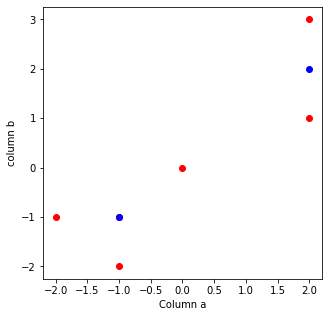

In [295]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c='r')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='b')
plt.xlabel('Column a')
plt.ylabel('column b')


In [296]:
from sklearn.cluster import DBSCAN

In [297]:
clustering = DBSCAN(eps=1.9, min_samples=2).fit(X)
clustering.labels_

array([ 0,  0,  0,  0, -1, -1])

In [299]:
cluster_labels = np.array([0,0,0,1,1,1])

In [300]:
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =",
        2,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.45993283428643883


In [286]:
score = silhouette_score(X, cluster_labels, metric='euclidean')

In [301]:
mean = np.mean(X, axis=0)
covariance = np.cov(X.T)

In [302]:
lambdas, eigvectors = np.linalg.eig(covariance)
# The first principal component
u_p = eigvectors[:, np.argmax(lambdas)]

In [303]:
slope = u_p[1]/u_p[0]

In [304]:
slope

1.0798772931080998

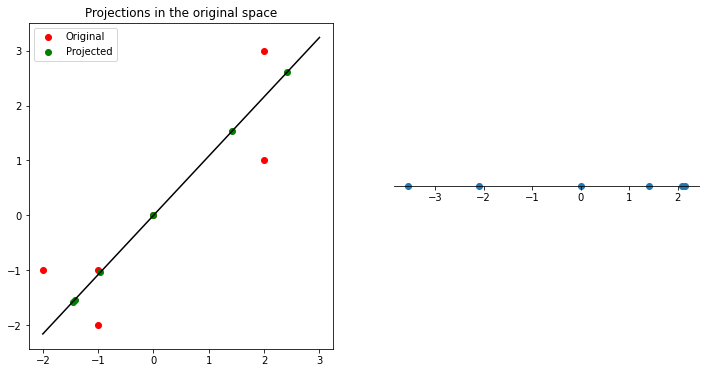

In [313]:
# Use the equation of a line to obtain a line parallel to u_p that passes through the mean
slope = u_p[1]/u_p[0]
x = np.linspace(-2, 3, 100)
y = slope*(x-mean[0]) + mean[1]

# Compute the projection on the line
proj = mean + (np.outer(u_p, u_p) @ (X-mean).T).T

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
axes[0].plot(x, y, 'k')
axes[0].scatter(X[:, 0], X[:, 1], color='r', label='Original')
axes[0].scatter(proj[:, 0], proj[:, 1], color='g', label='Projected')
axes[0].set_title('Projections in the original space')
axes[0].legend()

# The actual projection is simpler and lies on a space
# of lower dimension
reduced = u_p @ X.T
y_red = np.array([0] * len(reduced))
axes[1].scatter(reduced, y_red)
axes[1].yaxis.set_visible(False)
axes[1].spines['right'].set_color('none')
axes[1].spines['left'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].xaxis.set_ticks_position('bottom')
axes[1].spines['bottom'].set_position(('data',0))

In [319]:
proj

array([[-0.96017899, -1.03687549],
       [-1.42183074, -1.53540273],
       [-1.45870624, -1.57522374],
       [ 0.        ,  0.        ],
       [ 1.42183074,  1.53540273],
       [ 2.41888523,  2.61209923]])

In [321]:
from sklearn.manifold import MDS

In [323]:
mds = MDS(n_components=1,random_state=0)
X_transform = mds.fit_transform(X)
print(X_transform)

[[ 1.33662747]
 [ 1.99180744]
 [ 2.45397902]
 [-0.00745504]
 [-2.09273265]
 [-3.68222624]]
